In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///../sqlalchemy-challenge/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
    # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# use inspector to retrieve sql table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
#print the type of data in each column for the measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for item in columns:
    print(item['name'],item['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#print the type of data in each column for the station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for item in columns:
    print(item['name'],item['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
#View the measurement table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
#View the station table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [16]:
# Calculate the date 1 year ago from the last data point in the database
engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 1').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)]

In [17]:
# Perform a query to retrieve the data and precipitation scores from the last year
date_precip = engine.execute('SELECT date, prcp FROM measurement WHERE strftime("%Y-%m-%d", date) BETWEEN "2016-08-23" AND "2017-08-23"').fetchall()
for date in date_precip:
    print(date)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-10-12', 0.03)
('2016-10-13', 0.0)
('2016-10-14', 0.0)
('2016-10-15', 0.0)
('2016-10-16', 0.0)
('2016-10-17', 0.03)
('2016-10-18', 0.05)
('2016-10-19', 0.06)
('2016-10-20', 0.0)
('2016-10-21', 0.15)
('2016-10-22', 0.1)
('2016-10-23', 0.01)
('2016-10-24', 0.0)
('2016-10-25', 0.04)
('2016-10-26', 0.06)
('2016-10-27', 0.11)
('2016-10-28', 0.02)
('2016-10-29', 0.02)
('2016-10-30', 0.1)
('2016-10-31', 0.03)
('2016-11-01', 0.01)
('2016-11-02', 0.0)
('2016-11-03', 0.0)
('2016-11-04', 0.0)
('2016-11-05', 0.02)
('2016-11-06', 0.02)
('2016-11-07', 0.0)
('2016-11-08', 0.14)
('2016-11-09', 0.08)
('2016-11-10', 0.0)
('2016-11-11', 0.0)
('2016-11-12', 0.0)
('2016-11-13', 0.0)
('2016-11-14', 0.06)
('2016-11-15', 0.0)
('2016-11-16', 0.14)
('2016-11-17', 0.03)
('2016-11-18', 0.01)
('2016-11-19', 0.11)
('2016-11-20', 0.11)
('2016-11-21', 0.02)
('2016-11-22', 0.41)
('2016-11-23', 0.03)
('2016-11-24', 0.2)
('2016-11-25', 0.05)
('2016-11-26', 0.05)
('2016-11-27', 0.06)
('2016-11-28', 0.02)
('2016-11-

('2016-08-30', 0.0)
('2016-08-31', 0.24)
('2016-09-01', 0.02)
('2016-09-02', 0.01)
('2016-09-03', 0.12)
('2016-09-04', 0.14)
('2016-09-05', 0.03)
('2016-09-06', 0.11)
('2016-09-07', 0.16)
('2016-09-08', 0.07)
('2016-09-09', 0.16)
('2016-09-10', 0.09)
('2016-09-11', 0.3)
('2016-09-12', 0.31)
('2016-09-13', 0.34)
('2016-09-14', 2.33)
('2016-09-15', 0.83)
('2016-09-16', 0.06)
('2016-09-17', 0.36)
('2016-09-18', 0.07)
('2016-09-19', 0.01)
('2016-09-20', 0.22)
('2016-09-21', 0.07)
('2016-09-22', 0.34)
('2016-09-23', 0.94)
('2016-09-24', 0.01)
('2016-09-25', 0.03)
('2016-09-26', 0.17)
('2016-09-27', 0.17)
('2016-09-28', 0.0)
('2016-09-29', 0.59)
('2016-09-30', 0.25)
('2016-10-01', 0.14)
('2016-10-02', 0.06)
('2016-10-03', 0.16)
('2016-10-04', 0.03)
('2016-10-05', 0.01)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.28)
('2016-10-12', 0.03)
('2016-10-13', 0.0)
('2016-10-14', 0.0)
('2016-10-15', 0.04)
('2016-10-16', 0.0)
('2

('2016-12-10', 0.04)
('2016-12-11', 0.13)
('2016-12-12', 0.01)
('2016-12-13', 0.09)
('2016-12-14', 0.33)
('2016-12-15', 0.03)
('2016-12-16', 0.0)
('2016-12-18', None)
('2016-12-19', 0.15)
('2016-12-20', 0.0)
('2016-12-21', 0.55)
('2016-12-22', 1.24)
('2016-12-23', 0.83)
('2016-12-24', 1.08)
('2016-12-25', 0.38)
('2016-12-26', 1.48)
('2016-12-27', 0.14)
('2016-12-28', 0.14)
('2016-12-29', 1.03)
('2016-12-30', 2.37)
('2016-12-31', 0.9)
('2017-01-01', 0.03)
('2017-01-02', 0.0)
('2017-01-03', 0.0)
('2017-01-04', 0.0)
('2017-01-05', 0.47)
('2017-01-06', 0.1)
('2017-01-07', 0.0)
('2017-01-08', 0.03)
('2017-01-09', 0.0)
('2017-01-10', 0.0)
('2017-01-11', 0.0)
('2017-01-12', 0.0)
('2017-01-13', 0.0)
('2017-01-14', 0.0)
('2017-01-15', 0.01)
('2017-01-16', 0.0)
('2017-01-17', 0.0)
('2017-01-18', 0.07)
('2017-01-19', 0.0)
('2017-01-20', 0.0)
('2017-01-21', 0.08)
('2017-01-22', 0.72)
('2017-01-23', 0.85)
('2017-01-24', 1.85)
('2017-01-25', 2.64)
('2017-01-26', 0.1)
('2017-01-27', 0.03)
('2017-01-2

In [18]:
# Perform a query to retrieve the data and precipitation scores from the last year

sel = [Measurement.date, Measurement.prcp]
#time = "2016-08-23"
session.query(*sel).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [19]:
prcp_df = pd.DataFrame(date_precip, columns=["Date", "Precipitation"])

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by dateprcp_df = pd.DataFrame(date_precip, columns=["Date", "Precipitation"])
prcp_df.set_index("Date", inplace=True)
prcp_df.sort_values("Date", inplace=True)
prcp_df.dropna(inplace=True)
prcp_df.head(20)


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [21]:
#Ignore this cell, this is just me testing my VSCode portion
date_prcp_grouped = prcp_df.groupby("Date")

date_prcp_dict = {}

for date, precipitation in date_prcp_grouped:
    date_prcp_dict[date] = (precipitation["Precipitation"]).tolist()

date_prcp_dict 

{'2016-08-23': [0.0, 1.79, 0.05, 0.15, 0.7, 0.02],
 '2016-08-24': [0.08, 2.15, 2.28, 1.45, 1.22, 2.15],
 '2016-08-25': [0.08, 0.0, 0.21, 0.06, 0.0, 0.11, 0.08],
 '2016-08-26': [0.03, 0.01, 0.0, 0.04, 0.02, 0.0],
 '2016-08-27': [0.18, 0.12, 0.0, 0.0, 0.02],
 '2016-08-28': [0.6, 0.14, 0.01, 0.14, 0.14, 2.07],
 '2016-08-29': [0.0, 0.04, 0.0, 0.17, 0.9, 0.35],
 '2016-08-30': [0.0, 0.02, 0.0, 0.05, 0.0, 0.0],
 '2016-08-31': [0.1, 0.24, 0.13, 2.46, 0.25],
 '2016-09-01': [0.0, 0.02, 0.0, 0.01, 0.0],
 '2016-09-02': [0.0, 0.03, 0.02, 0.01, 0.19],
 '2016-09-03': [1.0, 0.08, 0.12, 0.0, 0.07],
 '2016-09-04': [0.03, 0.14, 0.74, 0.03, 0.44],
 '2016-09-05': [0.02, 0.03, 0.11, 0.18],
 '2016-09-06': [0.05, 0.03, 1.0, 0.11, 0.04],
 '2016-09-07': [0.16, 0.05, 0.11, 0.1, 1.35, 0.23],
 '2016-09-08': [0.07, 0.01, 0.15, 0.22, 0.01, 0.0],
 '2016-09-09': [0.23, 0.35, 0.29, 0.01, 0.03, 0.16],
 '2016-09-10': [0.0, 0.14, 1.16, 0.01, 0.09],
 '2016-09-11': [0.3, 0.12, 0.18, 0.05, 0.6],
 '2016-09-12': [1.04, 0.04, 0

In [22]:
prcp_df.count()

Precipitation    2021
dtype: int64

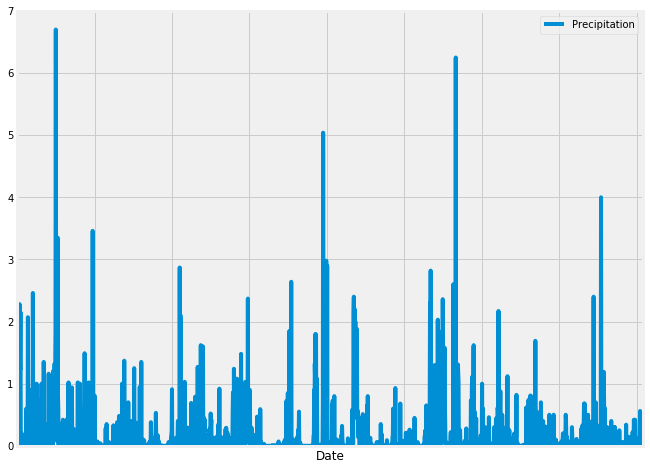

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot()
plt.xlim(0,2022)
plt.ylim(0,7)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
plt.rcParams["figure.figsize"] = [10,8]
plt.savefig("/Users/admin/Documents/Data_Analytics_Class/sqlalchemy-challenge/Precipitation_2016-1017.png")



In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![precipitation](Images/precipitation.png)

![describe](Images/describe.png)

In [25]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT * FROM station').fetchall()
#There appear to be 9 stations, as there are only 9 ids for "stations" table

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = [Measurement.id, Measurement.station]
stations = session.query(*station_count).\
    order_by(Measurement.station).all()
station_count_df = pd.DataFrame(stations, columns=["id", "station"])
active_stations_df = station_count_df.groupby("station").count()
active_stations_df.sort_values("id",ascending=False, inplace=True)
active_stations_df

,id
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

engine.execute('SELECT max(tobs), min(tobs), avg(tobs) FROM measurement WHERE station="USC00519281"').fetchall()

[(85.0, 54.0, 71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_station = engine.execute('SELECT date, tobs FROM measurement WHERE station="USC00519281" AND strftime("%Y-%m-%d", date) BETWEEN "2016-08-23" AND "2017-08-23"').fetchall()
for item in highest_station:
    print(item)

('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09'

In [29]:
most_active_station = pd.DataFrame(highest_station, columns=["Date", "Tobs"])
most_active_station.set_index("Date", inplace=True)
most_active_station.sort_values("Date", inplace=True)
most_active_station.head()


,Tobs
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


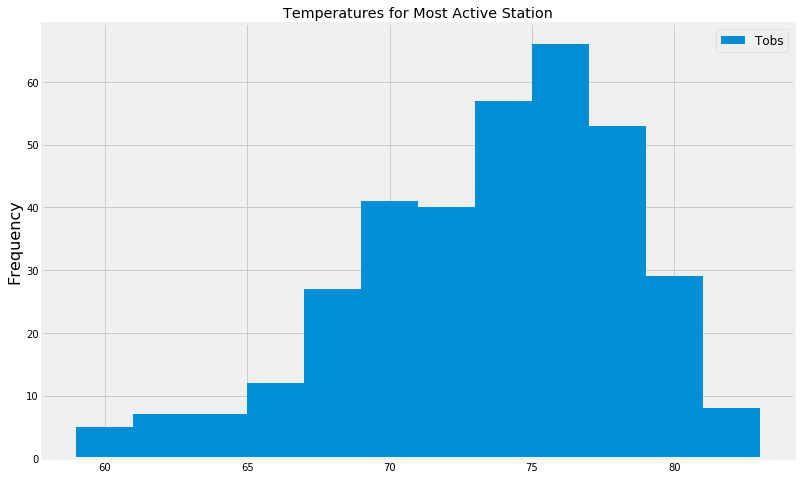

In [30]:
ax = most_active_station.hist(column='Tobs', bins=12, grid=True, figsize=(12,8), label="Tobs")
plt.title("Temperatures for Most Active Station")
plt.ylabel("Frequency", fontsize=16)
plt.legend(fontsize="large")
#plt.savefig("/Users/admin/Documents/Data_Analytics_Class/sqlalchemy-challenge/sqlalchemy_histogram.png")

![precipitation](Images/station-histogram.png)

In [31]:
# This function called `calc_temps` will accept a month date in the format '%m' 
# and return the minimum, average, and maximum temperatures for June in every year of the data (next cell is december)
#### SORRY this is different than the rubric layout but this is how the instructions were worded in the readme
def calc_temps(month):
    """TMIN, TAVG, and TMAX for the given month, inclusive of every year in the data.
    
    Args:
        month: A date string in the format '%m'
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(func.strftime("%m", Measurement.date) == month).all()

# function usage example
print(calc_temps('06'))

[(64.0, 74.94411764705882, 85.0)]


In [32]:
# This function called `calc_temps` will accept a month date in the format '%m' 
# and return the minimum, average, and maximum temperatures for June in every year of the data (next cell is december)
def calc_temps(month):
    """TMIN, TAVG, and TMAX for the given month, inclusive of every year in the data.
    
    Args:
        month: A date string in the format '%m'
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(func.strftime("%m", Measurement.date) == month).all()

# function usage example
print(calc_temps('12'))

[(56.0, 71.04152933421226, 83.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# This function called `calc_temps` will accept a month date in the format '%Y-%m%d' 
# and return the minimum, average, and maximum temperatures that year
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for the given year
    
    Args:
        start_date: A date string in the format '%Y-%m-%d'
        end_date: A date string in the format '%Y-%m-%d'
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter((Measurement.date) >= start_date).filter((Measurement.date) <= end_date).all()

# function usage example
print(calc_temps("2012-01-01", "2012-12-31"))

[(56.0, 72.26401515151515, 86.0)]


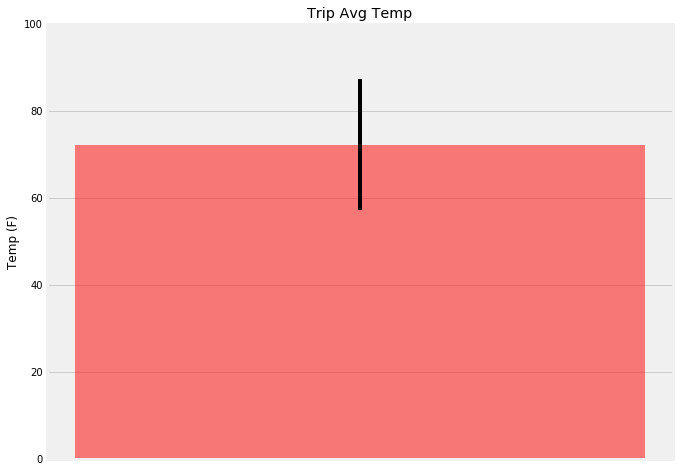

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
y = [72.26]
x=np.arange(len(y))
plt.bar(x, y, yerr=15, color="red", alpha=0.5, align="center", width=0.3)
plt.ylim(0,100)
plt.tick_params(
    axis='x',          
    which='both',    
    bottom=False,    
    top=False,     
    labelbottom=False) 
plt.rcParams["figure.figsize"] = [2,7]
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.grid(axis='x')
#plt.savefig("/Users/admin/Documents/Data_Analytics_Class/sqlalchemy-challenge/sqlalchemy_bargraph.png")
plt.show()


## Optional Challenge Assignment

In [35]:
trip_dates = ["01-01", "01-02","01-03","01-04","01-05"]

trip_temps = []

def daily_normals(date):
        sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
        return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
for day in trip_dates:
    temps = (daily_normals(day))
    trip_temps.append(temps)
        
print(trip_temps)



[[(62.0, 69.15384615384616, 77.0)], [(60.0, 69.39622641509433, 77.0)], [(62.0, 68.9090909090909, 77.0)], [(58.0, 70.0, 76.0)], [(56.0, 67.96428571428571, 76.0)]]
